<a href="https://colab.research.google.com/github/EmesBabasidi/CODSOFT/blob/main/Genre_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

## Reading and Setting up the dataframe

In [2]:
# Load the data
file_path = '/test_data_solution.txt'
columns = ['ID', 'TITLE', 'GENRE', 'DESCRIPTION']
data = pd.read_csv(file_path, sep=':::', names=columns, engine='python')
data.set_index('ID', inplace=True)

## Data Preprocessing

In [3]:
# Check for null values
print("Null values in each column:")
print(data.isnull().sum())

Null values in each column:
TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64


In [4]:
# Drop rows with missing values, if any
if data.isnull().sum().sum() > 0:
    data.dropna(inplace=True)

In [5]:
# Basic information about the dataset
print("Dataset information:")
data.info()

nDataset information:
<class 'pandas.core.frame.DataFrame'>
Index: 4817 entries, 1 to 4817
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TITLE        4817 non-null   object
 1   GENRE        4817 non-null   object
 2   DESCRIPTION  4817 non-null   object
dtypes: object(3)
memory usage: 150.5+ KB


In [6]:
# Basic statistics of the dataset
print("Dataset description:")
data.describe()

Dataset description:


,TITLE,GENRE,DESCRIPTION
count,4817,4817,4817
unique,4817,27,4814
top,Edgar's Lunch (1998),drama,In a small Russian town at the turn of the ce...
freq,1,1257,2


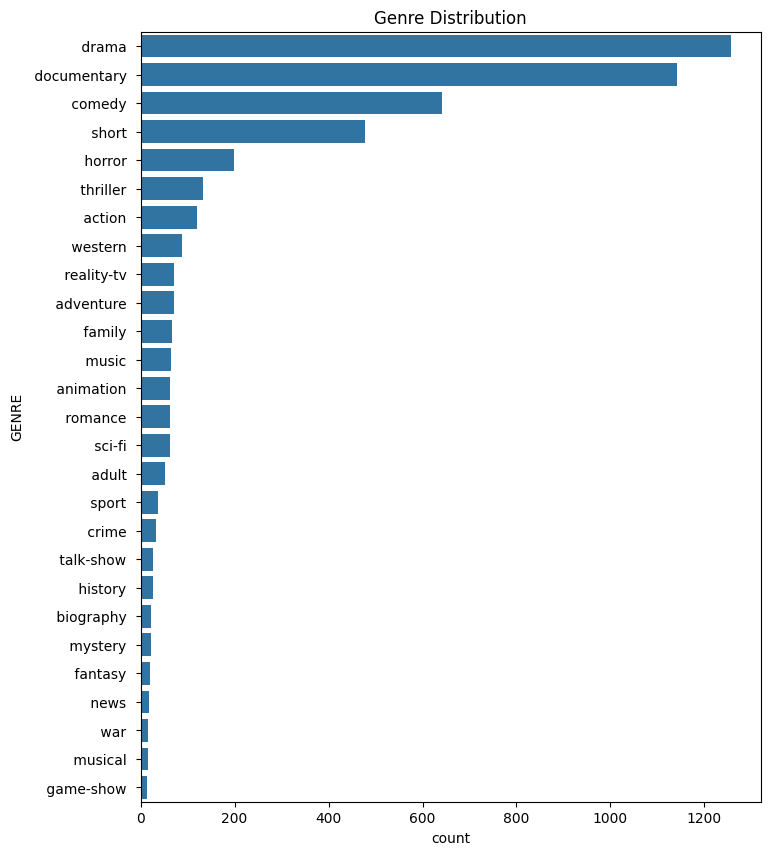

In [7]:
# Distribution of the target variable (GENRE)
plt.figure(figsize=(8,10))
sns.countplot(data=data, y="GENRE", order= data["GENRE"].value_counts().index)
plt.title("Genre Distribution")
plt.show()

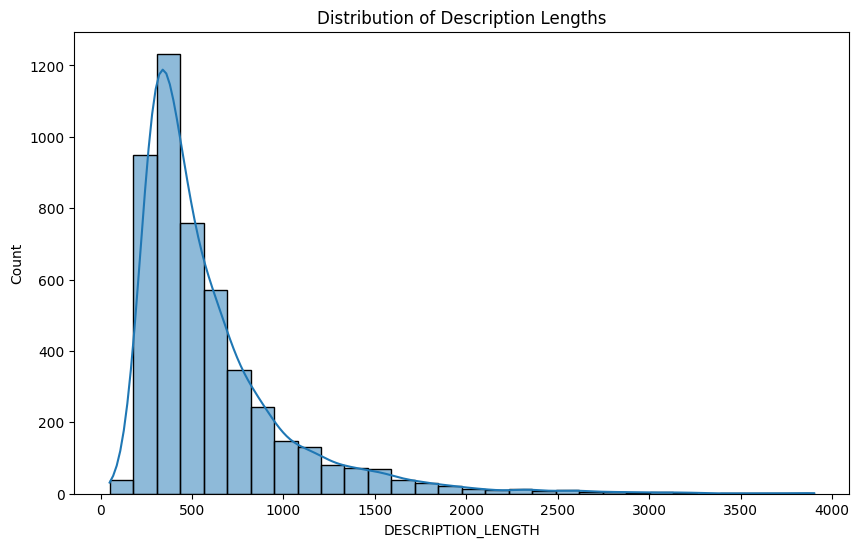

In [8]:
# Length of descriptions
data['DESCRIPTION_LENGTH'] = data['DESCRIPTION'].apply(len)

plt.figure(figsize=(10,6))
sns.histplot(data['DESCRIPTION_LENGTH'], kde=True, bins=30)
plt.title("Distribution of Description Lengths")
plt.show()

In [9]:
# Vectorize the 'DESCRIPTION' text data
vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 2))
X = vectorizer.fit_transform(data['DESCRIPTION'])

In [10]:
# Encode the target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['GENRE'])

## Using SMOTE
As it can be seen from the Genre distribution above, there is a significant imbalance in the data and it need to be handles. One of the ways to do that is using SMOTE(Synthetic Minority Over-sampling Technique).

In [11]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [12]:
# Split the data into training and testing sets with stratification
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

# Model Training and Tuning.
Due to the nature of the data, one of the best model to use is Random Forest Classifier as it effectively handles high-dimensional and potentially noisy data. Also has the abilty to handle imbalance datasets.


In [13]:
# Manual hyperparameter tuning for Random Forest
best_accuracy = 0
best_params = {}

# Iterate over a few selected hyperparameters
for n_estimators in [100, 150]:
    for max_depth in [10, 20]:
        for min_samples_split in [2, 5]:
            for min_samples_leaf in [1, 2]:
                model = RandomForestClassifier(
                    n_estimators=n_estimators,
                    max_depth=max_depth,
                    min_samples_split=min_samples_split,
                    min_samples_leaf=min_samples_leaf,
                    random_state=42
                )
                model.fit(x_train, y_train)
                y_pred = model.predict(x_test)
                accuracy = accuracy_score(y_test, y_pred)

                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_params = {
                        'n_estimators': n_estimators,
                        'max_depth': max_depth,
                        'min_samples_split': min_samples_split,
                        'min_samples_leaf': min_samples_leaf
                    }

In [14]:
# Train the best model
best_model = RandomForestClassifier(**best_params, random_state=42)
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

In [15]:
# Evaluate the model
report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

In [16]:
# Print the best hyperparameters, accuracy, and classification report
print(f'Best Hyperparameters: {best_params}')
print(f'Accuracy: {accuracy:.2f}')
print(f'Classification report: \n{report}')

Best Hyperparameters: {'n_estimators': 150, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 1}
Accuracy: 0.94
Classification report: 
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       377
           1       0.97      0.99      0.98       377
           2       1.00      0.99      1.00       377
           3       1.00      0.99      0.99       377
           4       1.00      1.00      1.00       377
           5       0.85      0.63      0.73       377
           6       0.97      0.99      0.98       378
           7       0.58      0.83      0.68       377
           8       0.51      0.51      0.51       377
           9       1.00      0.99      0.99       377
          10       1.00      0.98      0.99       377
          11       1.00      1.00      1.00       377
          12       1.00      1.00      1.00       377
          13       0.97      0.92      0.95       377
          14       0.97      0.98      0.9